In [1]:
import logging
import s3fs
import numpy as np
import os.path as op
import os

import AFQ.api as api
import AFQ.viz as viz

/Users/john/opt/miniconda3/envs/afq/lib/python3.7/site-packages/dipy/stats/__init__.py:7: UserWarning: The `dipy.stats` module is still under heavy development and functionality, as well as the API is likely to change in future versions of the software
  warnings.warn(w_string)


In [2]:
def afq_prek_api(subject):    
    logging.basicConfig(level=logging.INFO)
    log = logging.getLogger(__name__)  

    fs = s3fs.S3FileSystem()
    
    sub_prefix = f"sub-"
        
    dwi_dir = f'prek-diffusion/derivatives/sub-{subject}/dtiInit_ses-pre'
    dmri_prep_dir = op.join(op.expanduser('~'), 'AFQ_data', 'prek-diffusion/dmri_prep')

    prek_fdata_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.nii.gz")
    prek_fbval_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.bvals")
    prek_fbvec_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.bvecs")
    
    prek_fdata = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.nii.gz"
    prek_fbval = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.bvals"
    prek_fbvec = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.bvecs"
    
    fs.get(prek_fdata_src, prek_fdata)
    fs.get(prek_fbval_src, prek_fbval)
    fs.get(prek_fbvec_src, prek_fbvec)

    anat_dir = f'prek-diffusion/derivatives/sub-{subject}/freesurfer/mri'
    fs.get(op.join(anat_dir, f"aparc+aseg.nii.gz"), f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/anat/aparc+aseg.nii.gz")

    wm_labels=[250, 251, 252, 253, 254, 255, 41, 2, 16, 77]
    b0_threshold = 50

    tracking_params = {"n_seeds": 2, "directions": 'det', "stop_threshold": 0.2}
    segmentation_params = {"prob_threshold": 10, "b0_threshold": b0_threshold}
    clean_params = {"clean_rounds": 1}

    myafq = api.AFQ(dmri_prep_dir,
                    dwi_folder="dwi",
                    dwi_file="dwi*", 
                    anat_folder="anat",
                    wm_labels=wm_labels,
                    use_prealign=False,
                    sub_prefix=sub_prefix,
                    b0_threshold=b0_threshold,

                    tracking_params=tracking_params,
                    segmentation_params=segmentation_params,
                    clean_params=clean_params)

    #myafq.export_rois()
    #myafq.export_registered_b0()
    myafq.export_bundles()
    myafq.combine_profiles()
    return myafq

In [3]:
myafq = afq_prek_api(1110) # make example bundles

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/AFQ_data/templates 
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/AFQ_data/callosum_templates 
Data size is approximately 70MB


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/.dipy/mni_template 
['/Users/john/AFQ_data/prek-diffusion/dmri_prep/sub-1110/dtiInit_ses-pre/dwi/dwi_aligned_trilin.nii.gz']
[]
['/Users/john/AFQ_data/prek-diffusion/dmri_prep/sub-1110/dtiInit_ses-pre/anat/aparc+aseg.nii.gz']


INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from rasmm to vox
INFO:root:Moved streamlines from vox to rasmm
INFO:root:Moved streamlines from r

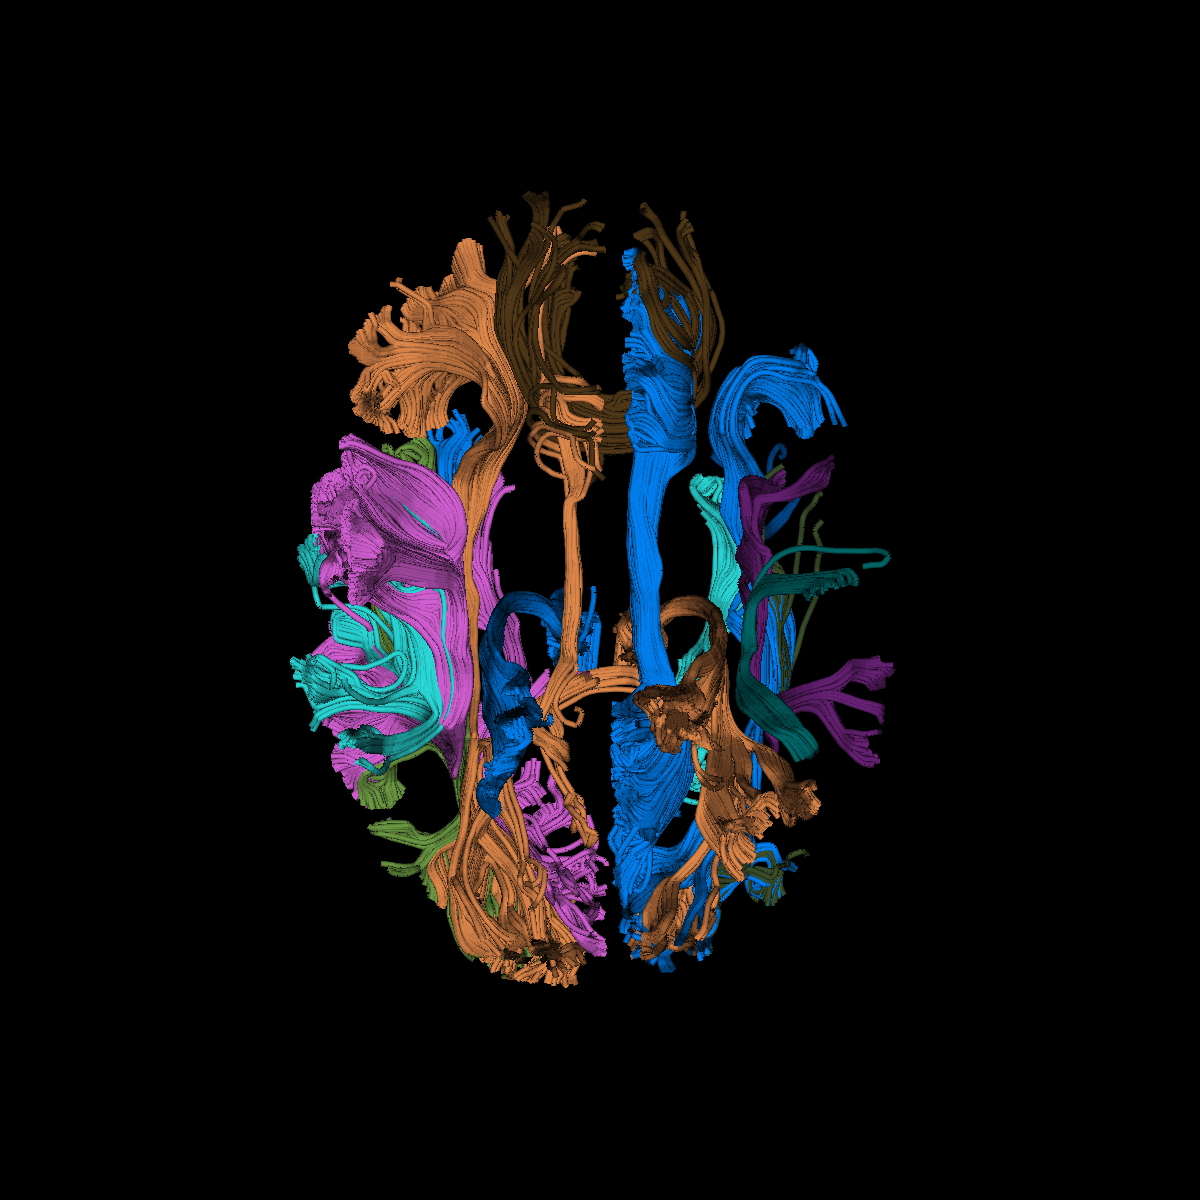

In [5]:
bundles = myafq.get_clean_bundles()[0]
scene = viz.visualize_bundles(bundles, interact=True)

In [7]:
viz.create_gif(scene, 'test.gif')

KeyboardInterrupt: 